<a href="https://colab.research.google.com/github/mnfibin/AI-ML-Internship-Elevate_Labs/blob/main/Task%207/svm_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines (SVM) for Breast Cancer Classification

###*BY FIBIN MN*

# SECTION 1: Install and Import Libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# SECTION 2: Upload and Load Dataset

In [14]:
print("=" * 70)
print("BREAST CANCER CLASSIFICATION USING SUPPORT VECTOR MACHINES")
print("=" * 70)

# Upload dataset from local storage
from google.colab import files
print("\n📂 Please upload your breast cancer dataset (CSV file)...")
uploaded = files.upload()

# Get the filename
filename = list(uploaded.keys())[0]
print(f"\n✅ File '{filename}' uploaded successfully!\\n")

# Load the dataset
df = pd.read_csv(filename)

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

BREAST CANCER CLASSIFICATION USING SUPPORT VECTOR MACHINES

📂 Please upload your breast cancer dataset (CSV file)...


Saving breast-cancer.csv to breast-cancer (1).csv

✅ File 'breast-cancer (1).csv' uploaded successfully!\n
Dataset Shape: (569, 32)

First few rows:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.

# SECTION 3: Data Exploration and Preprocessing


DATA EXPLORATION

Missing values per column:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Dataset Info

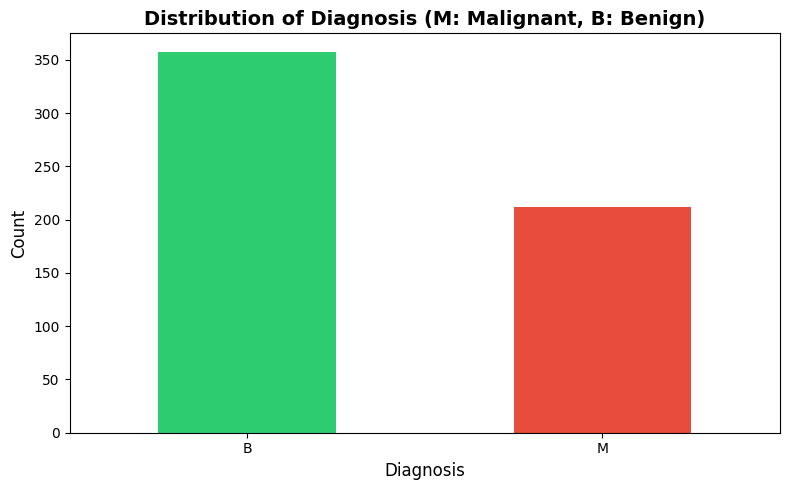

In [15]:
print("\n" + "=" * 70)
print("DATA EXPLORATION")
print("=" * 70)

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Dataset info
print("\nDataset Information:")
print(df.info())

# Statistical summary
print("\nStatistical Summary:")
print(df.describe())

# Check diagnosis distribution
print("\\nDiagnosis Distribution:")
print(df['diagnosis'].value_counts())

# Visualize class distribution
plt.figure(figsize=(8, 5))
df['diagnosis'].value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Distribution of Diagnosis (M: Malignant, B: Benign)', fontsize=14, fontweight='bold')
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# SECTION 4: Feature Selection and Data Preparation

In [16]:
print("\n" + "=" * 70)
print("DATA PREPARATION")
print("=" * 70)

# Separate features and target
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis'].map({'M': 1, 'B': 0})  # M: Malignant=1, B: Benign=0

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nNumber of features: {X.shape[1]}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Feature Scaling (Important for SVM!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✅ Features scaled using StandardScaler")


DATA PREPARATION

Features shape: (569, 30)
Target shape: (569,)

Number of features: 30

Training set size: 455
Test set size: 114

✅ Features scaled using StandardScaler


# SECTION 5: Train SVM with Linear Kernel


MODEL 1: SVM WITH LINEAR KERNEL

✅ Linear SVM Accuracy: 0.9649

Cross-Validation Scores: [0.96703297 0.98901099 0.94505495 0.96703297 0.94505495]
Mean CV Accuracy: 0.9626 (+/- 0.0329)

Classification Report (Linear SVM):
              precision    recall  f1-score   support

      Benign       0.95      1.00      0.97        72
   Malignant       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



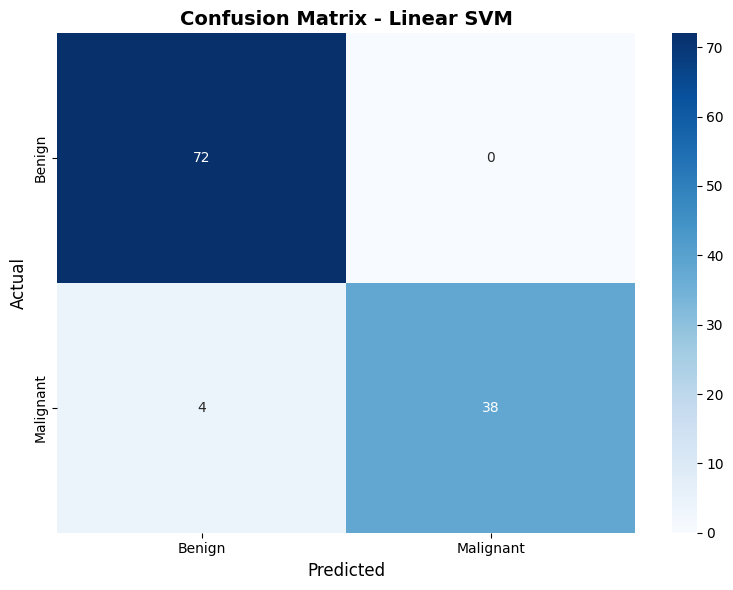

In [17]:
print("\n" + "=" * 70)
print("MODEL 1: SVM WITH LINEAR KERNEL")
print("=" * 70)

# Train Linear SVM
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train_scaled, y_train)

# Predictions
y_pred_linear = svm_linear.predict(X_test_scaled)

# Evaluate
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"\n✅ Linear SVM Accuracy: {accuracy_linear:.4f}")

# Cross-validation
cv_scores_linear = cross_val_score(svm_linear, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"\nCross-Validation Scores: {cv_scores_linear}")
print(f"Mean CV Accuracy: {cv_scores_linear.mean():.4f} (+/- {cv_scores_linear.std() * 2:.4f})")

# Classification Report
print("\nClassification Report (Linear SVM):")
print(classification_report(y_test, y_pred_linear, target_names=['Benign', 'Malignant']))

# Confusion Matrix
cm_linear = confusion_matrix(y_test, y_pred_linear)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix - Linear SVM', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

# SECTION 6: Train SVM with RBF (Non-linear) Kernel


MODEL 2: SVM WITH RBF KERNEL (NON-LINEAR)

✅ RBF SVM Accuracy: 0.9737

Cross-Validation Scores: [0.96703297 1.         0.96703297 0.96703297 0.97802198]
Mean CV Accuracy: 0.9758 (+/- 0.0256)

Classification Report (RBF SVM):
              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        72
   Malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



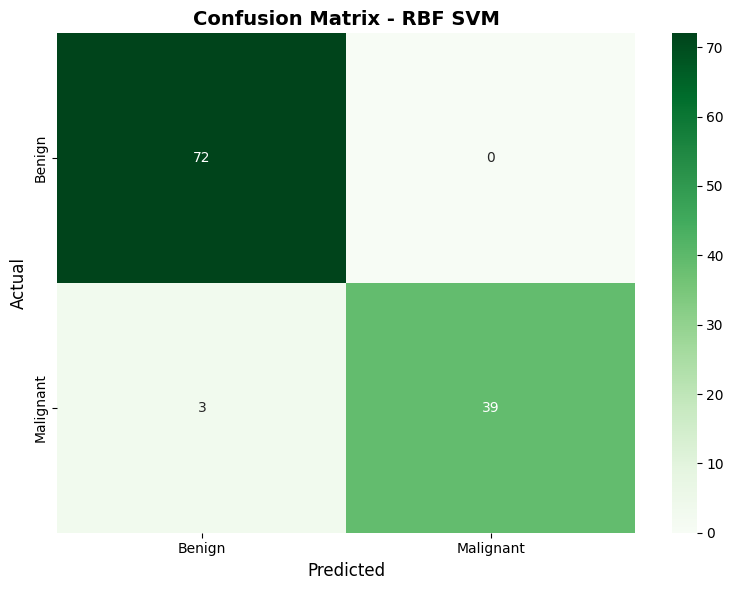

In [18]:
print("\n" + "=" * 70)
print("MODEL 2: SVM WITH RBF KERNEL (NON-LINEAR)")
print("=" * 70)

# Train RBF SVM
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

# Predictions
y_pred_rbf = svm_rbf.predict(X_test_scaled)

# Evaluate
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"\n✅ RBF SVM Accuracy: {accuracy_rbf:.4f}")

# Cross-validation
cv_scores_rbf = cross_val_score(svm_rbf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"\nCross-Validation Scores: {cv_scores_rbf}")
print(f"Mean CV Accuracy: {cv_scores_rbf.mean():.4f} (+/- {cv_scores_rbf.std() * 2:.4f})")

# Classification Report
print("\nClassification Report (RBF SVM):")
print(classification_report(y_test, y_pred_rbf, target_names=['Benign', 'Malignant']))

# Confusion Matrix
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix - RBF SVM', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

# SECTION 7: Hyperparameter Tuning with Grid Search

In [19]:
print("\n" + "=" * 70)
print("HYPERPARAMETER TUNING")
print("=" * 70)

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

print("\nSearching for best hyperparameters...")
print(f"Parameter grid: {param_grid}")

# Grid Search
grid_search = GridSearchCV(
    SVC(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

# Best parameters
print(f"\n✅ Best Parameters: {grid_search.best_params_}")
print(f"✅ Best Cross-Validation Score: {grid_search.best_score_:.4f}")

# Train with best parameters
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)

print(f"\n✅ Test Accuracy with Best Model: {accuracy_best:.4f}")

# Classification Report
print("\nClassification Report (Tuned SVM):")
print(classification_report(y_test, y_pred_best, target_names=['Benign', 'Malignant']))


HYPERPARAMETER TUNING

Searching for best hyperparameters...
Parameter grid: {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1], 'kernel': ['rbf']}
Fitting 5 folds for each of 24 candidates, totalling 120 fits

✅ Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
✅ Best Cross-Validation Score: 0.9758

✅ Test Accuracy with Best Model: 0.9737

Classification Report (Tuned SVM):
              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        72
   Malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



# SECTION 8: Decision Boundary Visualization (2D)


DECISION BOUNDARY VISUALIZATION

Explained variance ratio: [0.44593522 0.18545255]
Total variance explained: 0.6314


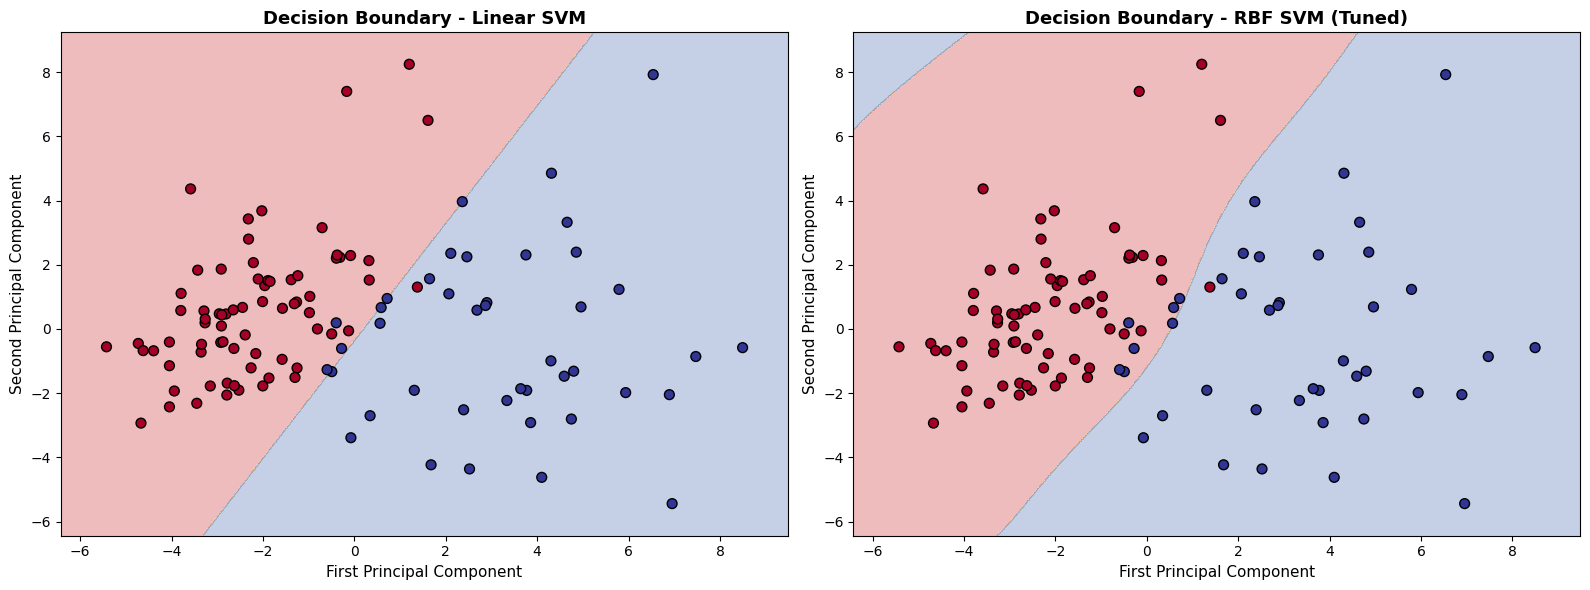

In [20]:
print("\n" + "=" * 70)
print("DECISION BOUNDARY VISUALIZATION")
print("=" * 70)

# Use PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"\nExplained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.4f}")

# Train SVMs on 2D data
svm_linear_2d = SVC(kernel='linear', C=1.0, random_state=42)
svm_rbf_2d = SVC(kernel='rbf', C=grid_search.best_params_['C'],
                 gamma=grid_search.best_params_['gamma'], random_state=42)

svm_linear_2d.fit(X_train_pca, y_train)
svm_rbf_2d.fit(X_train_pca, y_train)

# Create mesh for decision boundary
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolors='k', s=50)
    plt.xlabel('First Principal Component', fontsize=11)
    plt.ylabel('Second Principal Component', fontsize=11)
    plt.title(title, fontsize=13, fontweight='bold')

# Plot both decision boundaries
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

plt.subplot(1, 2, 1)
plot_decision_boundary(svm_linear_2d, X_test_pca, y_test,
                      'Decision Boundary - Linear SVM')

plt.subplot(1, 2, 2)
plot_decision_boundary(svm_rbf_2d, X_test_pca, y_test,
                      'Decision Boundary - RBF SVM (Tuned)')

plt.tight_layout()
plt.show()

# SECTION 9: Model Comparison


MODEL COMPARISON

         Model  Accuracy  CV Mean
   Linear SVM  0.964912 0.962637
      RBF SVM  0.973684 0.975824
Tuned RBF SVM  0.973684 0.975824


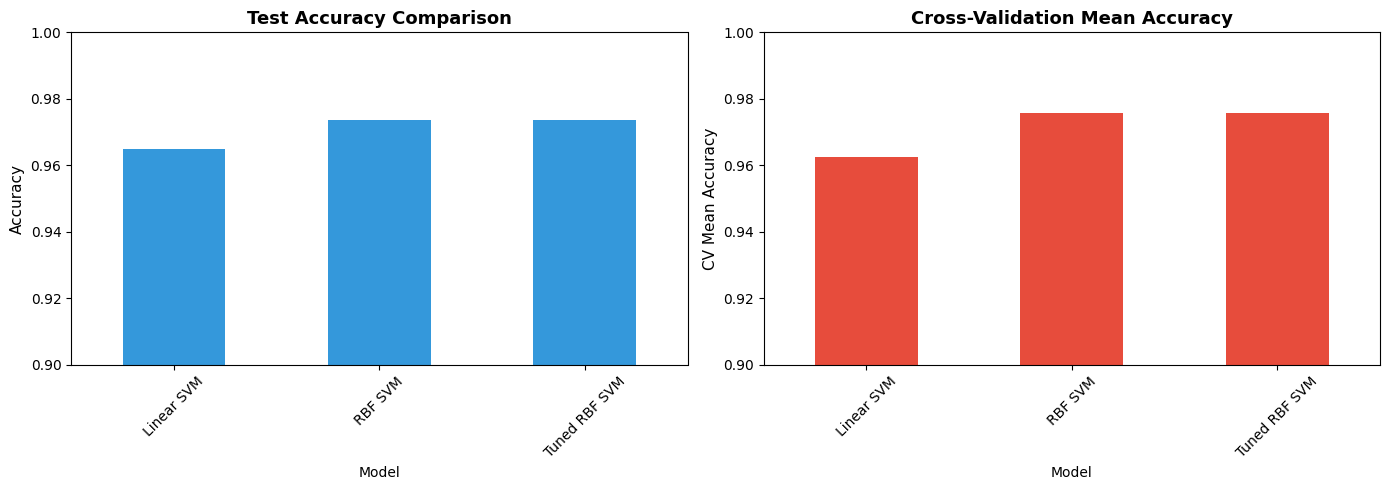

In [21]:
print("\n" + "=" * 70)
print("MODEL COMPARISON")
print("=" * 70)

# Compare all models
models_comparison = pd.DataFrame({
    'Model': ['Linear SVM', 'RBF SVM', 'Tuned RBF SVM'],
    'Accuracy': [accuracy_linear, accuracy_rbf, accuracy_best],
    'CV Mean': [cv_scores_linear.mean(), cv_scores_rbf.mean(), grid_search.best_score_]
})

print("\n", models_comparison.to_string(index=False))

# Visualize comparison
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

models_comparison.plot(x='Model', y='Accuracy', kind='bar', ax=ax[0],
                       color='#3498db', legend=False)
ax[0].set_title('Test Accuracy Comparison', fontsize=13, fontweight='bold')
ax[0].set_ylabel('Accuracy', fontsize=11)
ax[0].set_ylim([0.9, 1.0])
ax[0].tick_params(axis='x', rotation=45)

models_comparison.plot(x='Model', y='CV Mean', kind='bar', ax=ax[1],
                       color='#e74c3c', legend=False)
ax[1].set_title('Cross-Validation Mean Accuracy', fontsize=13, fontweight='bold')
ax[1].set_ylabel('CV Mean Accuracy', fontsize=11)
ax[1].set_ylim([0.9, 1.0])
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# SECTION 10: Summary and Key Learnings

In [22]:
print("\n" + "=" * 70)
print("SUMMARY AND KEY LEARNINGS")
print("=" * 70)

print("""
✅ KEY LEARNINGS:

1. MARGIN MAXIMIZATION:
   - SVM finds the optimal hyperplane that maximizes the margin between classes
   - Support vectors are the data points closest to the decision boundary

2. KERNEL TRICK:
   - Linear kernel: Works well for linearly separable data
   - RBF kernel: Can handle non-linear relationships by mapping to higher dimensions
   - The kernel trick allows computation in high-dimensional space efficiently

3. HYPERPARAMETER TUNING:
   - C parameter: Controls the trade-off between margin and misclassification
     • Small C: Larger margin, more misclassifications (underfitting)
     • Large C: Smaller margin, fewer misclassifications (overfitting)
   - Gamma parameter (RBF): Defines how far the influence of a single training example reaches
     • Small gamma: Far reach (smoother decision boundary)
     • Large gamma: Close reach (more complex boundary)

4. FEATURE SCALING:
   - Critical for SVM performance since it's distance-based
   - StandardScaler ensures all features contribute equally

5. MODEL EVALUATION:
   - Cross-validation provides robust performance estimates
   - Confusion matrix reveals false positives/negatives
   - Both metrics are crucial for medical diagnosis applications
""")

print(f"\n🎯 BEST MODEL ACHIEVED: {accuracy_best:.4f} accuracy")
print(f"📊 BEST PARAMETERS: C={grid_search.best_params_['C']}, gamma={grid_search.best_params_['gamma']}")
print("\n" + "=" * 70)
print("ANALYSIS COMPLETE!")
print("=" * 70);


SUMMARY AND KEY LEARNINGS

✅ KEY LEARNINGS:

1. MARGIN MAXIMIZATION:
   - SVM finds the optimal hyperplane that maximizes the margin between classes
   - Support vectors are the data points closest to the decision boundary
   
2. KERNEL TRICK:
   - Linear kernel: Works well for linearly separable data
   - RBF kernel: Can handle non-linear relationships by mapping to higher dimensions
   - The kernel trick allows computation in high-dimensional space efficiently
   
3. HYPERPARAMETER TUNING:
   - C parameter: Controls the trade-off between margin and misclassification
     • Small C: Larger margin, more misclassifications (underfitting)
     • Large C: Smaller margin, fewer misclassifications (overfitting)
   - Gamma parameter (RBF): Defines how far the influence of a single training example reaches
     • Small gamma: Far reach (smoother decision boundary)
     • Large gamma: Close reach (more complex boundary)
   
4. FEATURE SCALING:
   - Critical for SVM performance since it's dist